# Objective
The goal of this analysis is to utilize k-nearest neighbors (KNN) to identify what factors most significantly relate to patients being readmitted. The variables that will be analyzed are within the medical dataset provided. KNN classification will assist with creating an effective model to answer our research question.

In [1]:
# Import Packages and Libraries

import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [2]:
#  Read Medical Dataset

df = pd.read_csv(r"E:\Users\laisu\Downloads\medical_clean.csv",dtype={'locationid':np.int64})

In [3]:
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


# Data Cleaning and Preparation
- Detecting for duplicates, missing values, and outliers
- Data Wrangling
- Exploratory Data Analysis

In [4]:
# Detecting Duplicates

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
# Detecting Missing Values

df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

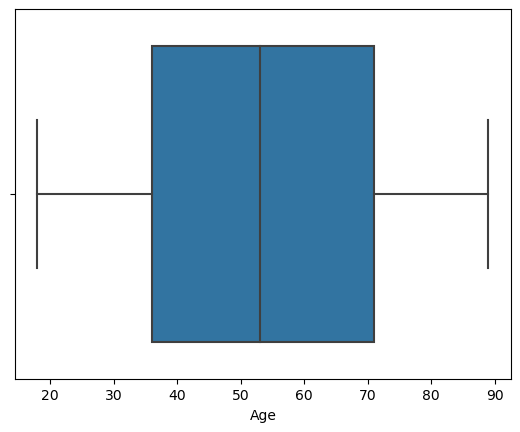

In [6]:
# Detecting Outliers

boxplot=sns.boxplot(x= 'Age',data=df)

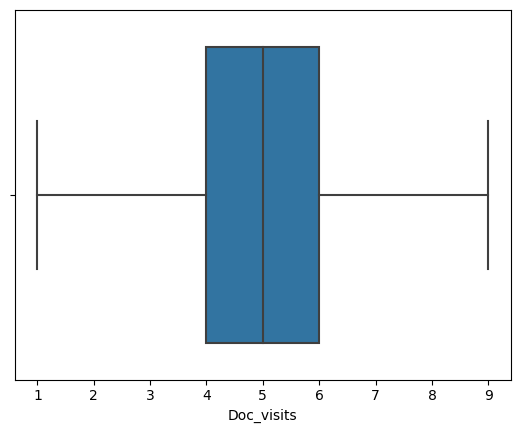

In [7]:
boxplot=sns.boxplot(x= 'Doc_visits',data=df)

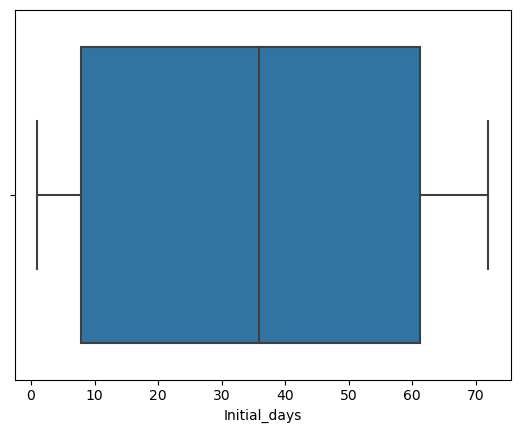

In [8]:
boxplot=sns.boxplot(x= 'Initial_days',data=df)

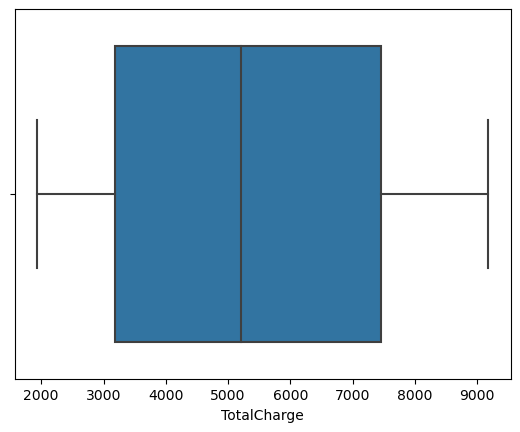

In [9]:
boxplot=sns.boxplot(x= 'TotalCharge',data=df)

In [10]:
# Data Wrangling, Changing categorical values to numerical

df['Anxiety_dum'] = [1 if v == 'Yes' else 0 for v in df['Anxiety']]
df['ReAdmis_dum'] = [1 if v == 'Yes' else 0 for v in df['ReAdmis']]
df['Doc_visits_dum'] = [1 if v == 'Yes' else 0 for v in df['Doc_visits']]
df['HighBlood_dum'] = [1 if v == 'Yes' else 0 for v in df['HighBlood']]
df['Stroke_dum'] = [1 if v == 'Yes' else 0 for v in df['Stroke']]
df['Overweight_dum'] = [1 if v == 'Yes' else 0 for v in df['Overweight']]
df['Arthritis_dum'] = [1 if v == 'Yes' else 0 for v in df['Arthritis']]
df['Diabetes_dum'] = [1 if v == 'Yes' else 0 for v in df['Diabetes']]
df['Hyperlipidemia_dum'] = [1 if v == 'Yes' else 0 for v in df['Hyperlipidemia']]
df['BackPain_dum'] = [1 if v == 'Yes' else 0 for v in df['BackPain']]
df['Allergic_rhinitis_dum'] = [1 if v == 'Yes' else 0 for v in df['Allergic_rhinitis']]
df['Reflux_esophagitis_dum'] = [1 if v == 'Yes' else 0 for v in df['Reflux_esophagitis']]
df['Asthma_dum'] = [1 if v == 'Yes' else 0 for v in df['Asthma']]

In [11]:
df['Complication_numeric'] = df['Complication_risk']
dict_comp = {"Complication_numeric": {"Low": 0, "Medium": 1, "High": 2}}
df.replace(dict_comp, inplace=True)

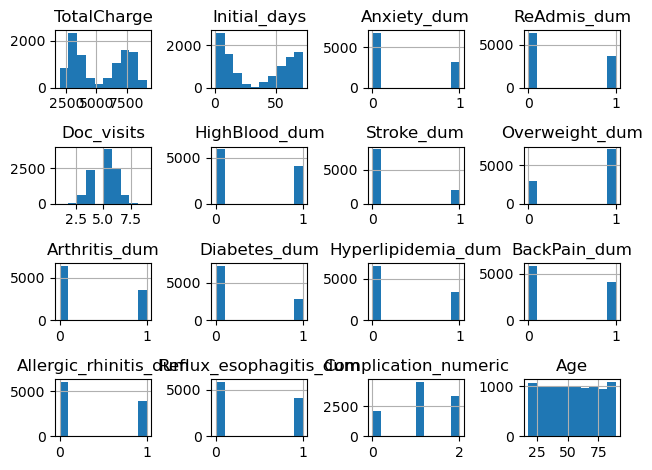

In [12]:
# Data Exploration

df[["TotalCharge", "Initial_days", "Anxiety_dum", "ReAdmis_dum", "Doc_visits", "HighBlood_dum", "Stroke_dum", "Overweight_dum", "Arthritis_dum", "Diabetes_dum", "Hyperlipidemia_dum", "BackPain_dum", "Allergic_rhinitis_dum", "Reflux_esophagitis_dum", "Complication_numeric", "Age"]].hist()
plt.tight_layout()

In [27]:
# Descriptive Statistics

df1 = df[["TotalCharge", "Anxiety_dum", "ReAdmis_dum", "Doc_visits", "HighBlood_dum", "Stroke_dum", "Overweight_dum", "Arthritis_dum", "Diabetes_dum", "Hyperlipidemia_dum", "BackPain_dum", "Allergic_rhinitis_dum", "Reflux_esophagitis_dum", "Complication_numeric", "Age", "Initial_days"]]
df1.describe()

,TotalCharge,Anxiety_dum,ReAdmis_dum,Doc_visits,HighBlood_dum,Stroke_dum,Overweight_dum,Arthritis_dum,Diabetes_dum,Hyperlipidemia_dum,BackPain_dum,Allergic_rhinitis_dum,Reflux_esophagitis_dum,Complication_numeric,Age,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5312.172769,0.321500,0.366900,5.012200,0.409000,0.199300,0.709400,0.357400,0.27380,0.337200,0.411400,0.394100,0.413500,1.123300,53.511700,34.455299
std,2180.393838,0.467076,0.481983,1.045734,0.491674,0.399494,0.454062,0.479258,0.44593,0.472777,0.492112,0.488681,0.492486,0.730172,20.638538,26.309341
min,1938.312067,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.001981
25%,3179.374015,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,36.000000,7.896215
50%,5213.952000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,53.000000,35.836244
75%,7459.699750,1.000000,1.000000,6.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000,71.000000,61.161020
max,9180.728000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000,89.000000,71.981490


# Analysis
- Scaling Data
- Feature Selection
- Splitting and training the data
- Determining K
- Classification model, Confusion Matrix, and ROC Curve

To run our analysis utilizing k-NN classification, we needed to determine what our k value will be. To do this, I utilized the GridSearchCV function to calculate an optimal k value. This calculation resulted in 28 neighbors. To ensure confidence, I ran a knn cv score test, which resulted in approximately 98 percent.  

I then performed the KNN classifcation utilizing my k value of 28 and created a confusion matrix. The confusion matrix displayed the actual and false positive predictions for the KNN model. I then calculated the training and testing accuracy of the KNN model, which resulted in 97 and 98 percent respectfully. I also created a visualization for a ROC curve, followed by an accuracy score test for the AUC. I finished by running a summary statistic of our model.

In [28]:
# scaling the data for KNN

X = df1.drop(["ReAdmis_dum"], axis=1).copy()
Xs = df[["Initial_days", "Age", "Doc_visits"]]
y = df["ReAdmis_dum"]
scaledX = scale.fit_transform(Xs)
print(scaledX)

[[-0.9073098  -0.02479466  0.94464652]
 [-0.73459473 -0.1217056  -0.96798057]
 [-1.12829151 -0.02479466 -0.96798057]
 ...
 [ 1.3569578  -0.4124384  -0.96798057]
 [ 1.09858493 -0.50934933 -0.01166703]
 [ 1.38342919  0.79894828 -0.01166703]]


In [29]:
# Feature Selection

feat_select = SelectKBest(f_classif, k='all')
feat_select.fit_transform(X, y)
feat_pvals = pd.DataFrame({'Feature' : X.columns, 'p_value' : feat_select.pvalues_}).sort_values('p_value') 
feat_pvals[feat_pvals['p_value'] < 0.05]


,Feature,p_value
0,TotalCharge,0.0
14,Initial_days,0.0


In [30]:
# Splitting the code

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 15, stratify = y)

In [31]:
# Saving the data sets to CSV

X_train.to_csv('task1_Xtrain.csv', index=False)
X_test.to_csv('task1_Xtest.csv', index=False)
y_train.to_csv('task1_ytrain.csv', index=False)
y_test.to_csv('task1_ytest.csv', index=False)

In [32]:
# Determing K

param_grid = {'n_neighbors' : np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
knn_cv.best_params_

{'n_neighbors': 5}

In [33]:
knn_cv.best_score_

0.9606250000000001

In [34]:
# Initial Confusion Matrix and KNN

knn = KNeighborsClassifier(n_neighbors = 28)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix for this KNN model:")
print("Predicted ReAdmission | Predicted ReAdmission")
print(f"                 {final_matrix[0]} Actual ReAdmission")
print(f"                 {final_matrix[1]} Actual ReAdmission")
print(f"The training accuracy of this KNN classification is {knn.score(X_train, y_train)}.")
print(f"The testing accuracy of this KNN classification model is {knn.score(X_test, y_test)}.")

Confusion matrix for this KNN model:
Predicted ReAdmission | Predicted ReAdmission
                 [1223   43] Actual ReAdmission
                 [ 39 695] Actual ReAdmission
The training accuracy of this KNN classification is 0.9595.
The testing accuracy of this KNN classification model is 0.959.


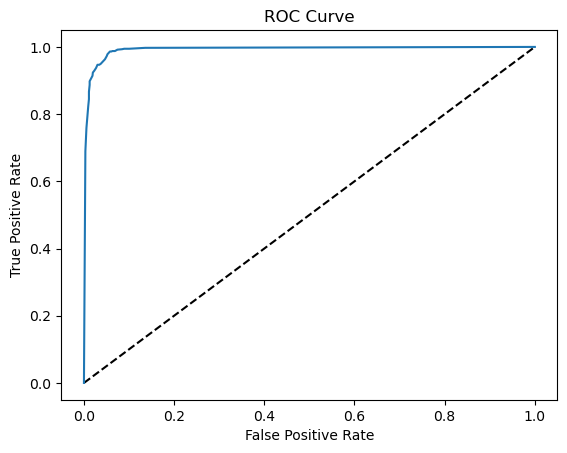

The Area Under the Curve (AUC) score is: 0.9919186995019607

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1266
           1       0.94      0.95      0.94       734

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [35]:
# ROC Curve

y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))

In [36]:
df.to_csv (r"E:\Users\laisu\Documents\data4.csv")

# Results
Within our ROC KNN model, there is a central diagonal line that represents a 50 percent classification rate. The Area Under the Curve (AUC) score is a percentage of the model’s area beneath the curve that is created by the KNN classification. The higher the percentage equates to a more accurate model. The resulting AUC score of our classification model was approximately 99.8 percent.

The accuracy scores that were mentioned above provide confidence in our ROC KNN classification model. With a precision score of 98 percent, the model shows it can accurately predict if a patient is readmitted within 30 days of discharge 98 percent of the time with the predictor variables provided. The accuracy scores that resulted from indicates this model as a strong classifier of data that can produce accurate resuts based on our input variables with confidence.

# Limitations and Recommendations
One of the main limitations of K-Nearest Neighbor classification is the number of neighbors, or k. Though there are calculations to determine the best k value, there can be large inaccuracies depending on the k value chosen. Intuitively, most would believe that a larger k value would result in more accurate classification as there are more neighbors to classify the data point of interest. However, this may not be the case as a larger number of data points increases the sensitivity of the classification.

Though our ROC KNN model returned very high accuracy scores, it is difficult to provide recommendations to stakeholders based only on our analysis. The KNN classification does not measure for a causal relationship, it classifies similar factors of input data points that are a certain distance from our data point of interest. I also believe that many of the limitations to our model are due to the data set that I utilized. As I have mentioned in previous courses, I do not believe there are an adequate quality of variables to accurately determine the significant factors for the readmission of patients. I would recommend for stakeholders to add more variables that can better predict what classification of factors that impact the readmission of patients.